In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

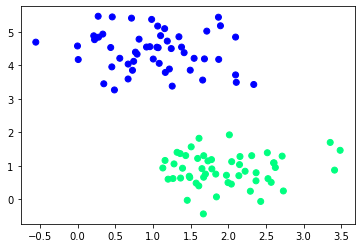

In [ ]:
v   X, y = make_blobs(n_samples= 125, centers= 2, cluster_std = 0.60, random_state = 0)

train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 20, random_state=0)

plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap='winter')

In [ ]:
svc = SVC(kernel= 'linear')
svc.fit(train_X, train_y)

SVC(kernel='linear')

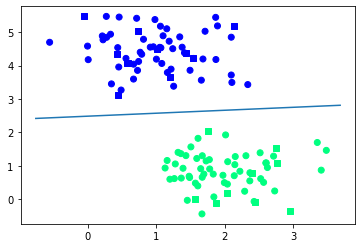

In [ ]:
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap= 'winter')

ax = plt.gca()
xlim = ax.get_xlim()


ax.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap= 'winter', marker = 's')

w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - (svc.intercept_[0] / w[1])
plt.plot(xx,yy)
plt.show()

In [ ]:
pred_y = svc.predict(test_X)

In [ ]:
confusion_matrix(test_y, pred_y)

array([[11,  0],
       [ 0,  9]], dtype=int64)

In [ ]:
data = pd.read_csv('survey_lung_cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
data.shape

(309, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
data['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
data['LUNG_CANCER'].unique()

array(['YES', 'NO'], dtype=object)

## Data Processing

In [ ]:
data['GENDER'] = data['GENDER'].replace({'F': 0, 'M': 1})

In [ ]:
data['LUNG_CANCER'] = data['LUNG_CANCER'].replace({'YES': 0, 'NO': 1})

In [ ]:
data['LUNG_CANCER'].value_counts()

0    270
1     39
Name: LUNG_CANCER, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

### Train Test Split

In [ ]:
X = data.drop('LUNG_CANCER', axis = 1)
y = data['LUNG_CANCER']

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 20, random_state=0)

In [ ]:
# resample dataset
from sklearn.utils import resample

# concatenate our training data back together
X = pd.concat([train_X, train_y], axis=1)

In [ ]:
len(X)

289

In [ ]:
# separate minority and majority classes
no_lungcancer = X[X.LUNG_CANCER==1]
lungcancer = X[X.LUNG_CANCER==0]

In [ ]:
print(len(no_lungcancer))
print(len(lungcancer))

35
254


## Upsampling

In [ ]:
# upsample minority
no_lungcancer_upsampled = resample(no_lungcancer,
                          replace=True, # sample with replacement
                          n_samples=len(lungcancer), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([lungcancer, no_lungcancer_upsampled])

# check new class counts
upsampled.LUNG_CANCER.value_counts()

0    254
1    254
Name: LUNG_CANCER, dtype: int64

In [ ]:
y.value_counts()

0    270
1     39
Name: LUNG_CANCER, dtype: int64

# SUPPORT VECTOR MACHINE

In [ ]:
SVMmodel = SVC()
SVMmodel.fit(train_X, train_y)

SVC()

In [ ]:
SVMmodel_prediction = SVMmodel.predict(test_X)

In [ ]:
# Model Evaluation

def ConfusionMatrix(ytest, ypred, label = ['Negative', 'Positive']):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot = True, cbar= False, fmt= 'd', cmap = 'YlGnBu')
    plt.xlabel('Predicted', fontsize= 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.ylabel('Truth', fontsize = 13)
    plt.title('A confusion matrix')

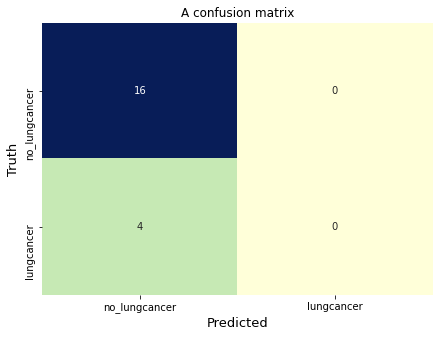

In [ ]:
ConfusionMatrix(test_y, SVMmodel_prediction, label=['no_lungcancer', 'lungcancer'])

In [ ]:
# Accuracy of the model
metrics.accuracy_score(test_y, SVMmodel_prediction)

0.8

In [ ]:
metrics.f1_score(test_y, SVMmodel_prediction)

0.0